In [ ]:
!pip install --upgrade jax jaxlib==0.1.64+cuda110 -f https://storage.googleapis.com/jax-releases/jax_releases.html

In [ ]:
import jax
import numpy.random as npr
import time

from jax import jit,grad,vmap,random,pmap
from jax.scipy.special import logsumexp
import jax.numpy as np

In [ ]:
x=np.array([1,2,3])
x

DeviceArray([1, 2, 3], dtype=int32)

In [ ]:
x[:2]

DeviceArray([1, 2], dtype=int32)

In [ ]:
import autograd
import autograd.numpy as anp
from autograd import grad

In [ ]:
def tanh(x):
  y=anp.exp(-2.0*x)
  return (1.0-y)/(1.0+y)

grad_tanh=grad(tanh)

In [ ]:
print(grad_tanh)

<function unary_to_nary.<locals>.nary_operator.<locals>.nary_f at 0x7f79c37ea5f0>


In [ ]:
grad_tanh(1.0)

0.419974341614026

In [ ]:
(tanh(1.0001)-tanh(0.9999))/0.0002

0.41997434264973155

In [ ]:
print(egrad(tanh))

<function unary_to_nary.<locals>.nary_operator.<locals>.nary_f at 0x7f79c37d27a0>


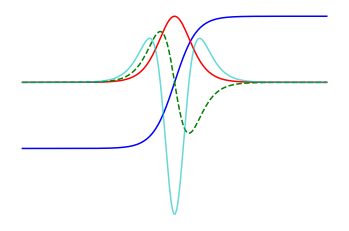

In [ ]:
from autograd import elementwise_grad as egrad
import matplotlib.pyplot as plt

x=anp.linspace(-7,7,200)
plt.plot(x,tanh(x),'b')
plt.plot(x,egrad(tanh)(x),'r')
plt.plot(x,egrad(egrad(tanh))(x),'g--')
plt.plot(x,egrad(egrad(egrad(tanh)))(x),color='c',alpha=0.6)
plt.axis('off')
plt.show()

In [ ]:
print(x.shape)

(200,)


In [ ]:
grad_tanh1=egrad(tanh)(x)
print(grad_tanh1.shape)

(200,)


In [ ]:
grad_tanh(1.2)

0.30501999620740905

In [ ]:
egrad(tanh)(anp.array([1.2,2.4]))

array([0.30502   , 0.03238377])

In [ ]:
def predict(params,inputs):
  for W,b in params:
    output=jnp.dot(inputs,W)+b
    outputs=jnp.tanh(outputs)
  return outputs

def logprob_fun(params,inputs,targets):
  preds=predict(params,inputs)
  return np.sum((preds-targets)**2)

grad_fn=jit(grad(logprob_fun))
perex_grads=jit(vmap(grad_fn,in_axes=(None,0,0)))

In [ ]:
def abs_val(x):
  if x>0:
   return x
  else:
    return -x

abs_val_grad=grad(abs_val)
print(abs_val_grad(1.0))
print(abs_val_grad(-1.0))

1.0
-1.0


In [ ]:
def slow_f(x):
  return x*x+x*2.0

new_grad=grad(slow_f)
new_grad(1.0)

DeviceArray(4., dtype=float32)

In [ ]:
x=np.ones((5000,5000))
fast_f=jit(slow_f)

In [ ]:
%timeit -n10 -r3 slow_f(x)
%timeit -n10 -r3 fast_f(x)

10 loops, best of 3: 1.21 ms per loop
10 loops, best of 3: 72.6 µs per loop


In [ ]:
keys=random.split(random.PRNGKey(0),1)
print(random.PRNGKey(0))
print(keys)

[0 0]
[[ 928981903 3453687069]]


In [ ]:
mats=pmap(lambda key:random.normal(key,(5000,5000)))(keys)

In [ ]:
print(mats.shape)

(1, 5000, 5000)


In [ ]:
mats

ShardedDeviceArray([[[-0.87019426,  0.01972901,  0.22640486, ...,
                      -0.37454543, -0.64242613,  0.3031186 ],
                     [ 0.53129244,  0.32618856, -1.1704537 , ...,
                      -0.9485279 ,  1.4899558 , -0.42557827],
                     [ 2.6284018 , -0.81543285,  1.8655902 , ...,
                       1.383173  ,  0.13609554,  0.8321134 ],
                     ...,
                     [ 0.05763421, -1.1380501 , -0.1416731 , ...,
                      -0.82615894,  1.511998  ,  0.4794723 ],
                     [-0.8174312 ,  1.4516509 ,  0.33721426, ...,
                      -1.0761003 , -1.0515822 , -0.8282714 ],
                     [ 0.3497559 , -0.5198364 ,  0.88115907, ...,
                      -0.11560184,  0.8695567 ,  0.3258035 ]]],                   dtype=float32)

In [ ]:
random.normal(keys[0],(5000,5000))

DeviceArray([[-0.87019426,  0.01972901,  0.22640486, ..., -0.37454543,
              -0.64242613,  0.3031186 ],
             [ 0.53129244,  0.32618856, -1.1704537 , ..., -0.9485279 ,
               1.4899558 , -0.42557827],
             [ 2.6284018 , -0.81543285,  1.8655902 , ...,  1.383173  ,
               0.13609554,  0.8321134 ],
             ...,
             [ 0.05763421, -1.1380501 , -0.1416731 , ..., -0.82615894,
               1.511998  ,  0.4794723 ],
             [-0.8174312 ,  1.4516509 ,  0.33721426, ..., -1.0761003 ,
              -1.0515822 , -0.8282714 ],
             [ 0.3497559 , -0.5198364 ,  0.88115907, ..., -0.11560184,
               0.8695567 ,  0.3258035 ]], dtype=float32)

In [ ]:
np.mean(mats,axis=-1)

DeviceArray([[ 0.00620442,  0.00547729,  0.00967285, ...,  0.01436097,
              -0.00563139, -0.00415294]], dtype=float32)

In [ ]:
from functools import partial
from jax import lax


@partial(pmap,axis_name='i')
def normalize(x):                 #Need 4 logical devices
  return x/lax.psum(x,'i')

print(normalize(np.arange(1.)))

In [ ]:
import jax.numpy as jnp

In [ ]:
A,B,C,D=2,3,4,5
x=np.ones((A,B))
y=jnp.ones((B,C))
z=jnp.ones((C,D))

def foo(tree_arg):
  x,(y,z)=tree_arg
  return jnp.dot(x,jnp.dot(y,z))  #(2,3)*(3,5)=(2,5)

In [ ]:
tree=(x,(y,z))
%timeit foo(tree)

1000 loops, best of 5: 559 µs per loop


In [ ]:
%timeit jit(foo)(tree)

1000 loops, best of 5: 446 µs per loop


In [ ]:
print(foo(tree))

[[12. 12. 12. 12. 12.]
 [12. 12. 12. 12. 12.]]


In [ ]:
print(x.shape)
print(y.shape)
print(z.shape)

(2, 3)
(3, 4)
(4, 5)


In [ ]:
K=6 #batch size
x=jnp.ones((K,A,B))  # batch axis in different locations
y=jnp.ones((B,K,C))
z=jnp.ones((C,D,K))
tree=(x,(y,z))

In [ ]:
print(x.shape)
print(y.shape)
print(z.shape)

(6, 2, 3)
(3, 6, 4)
(4, 5, 6)


In [ ]:
vfoo=vmap(foo,in_axes=((0,(1,2)),))
print(vfoo(tree).shape)

(6, 2, 5)
